<a href="https://colab.research.google.com/github/JoseAaronE/FisicaComputacional/blob/master/Actividad8/Actividad8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esquivel Ovilla José Aarón 

In [204]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

**Ejercicio 1:**

Resuelva la ecuación diferencial del oscilador de Van der Pol

\begin{equation*}
\frac{d^2 x}{d t^2} - \mu (1 - x^2) \frac{dx}{dt } + x = 0
\end{equation*}

donde $x$ es la posición y $\mu$ es un parámetro de la parte no lineal. 

Resuelva el caso para $\mu = 0, 1, 2, 3, 4$ y grafique las soluciones para un tiempo de integración de t = [0, 50]

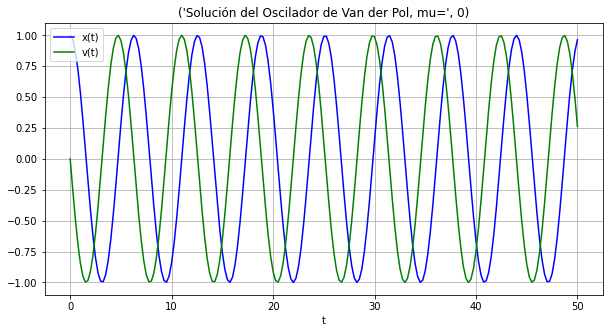

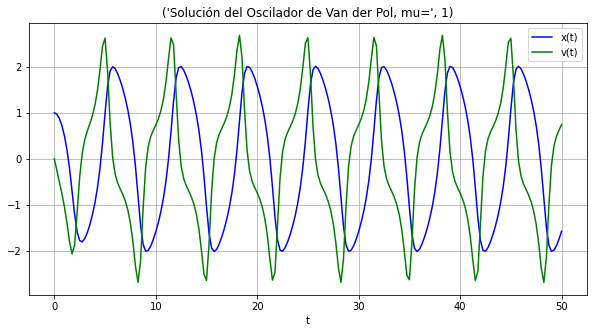

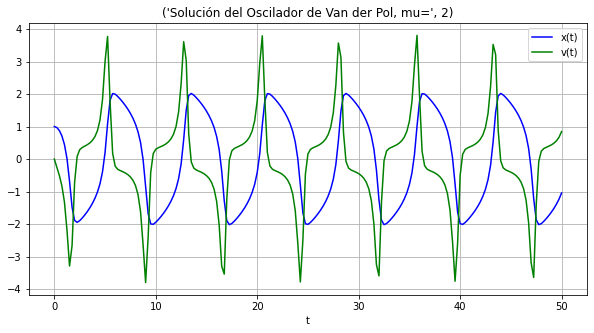

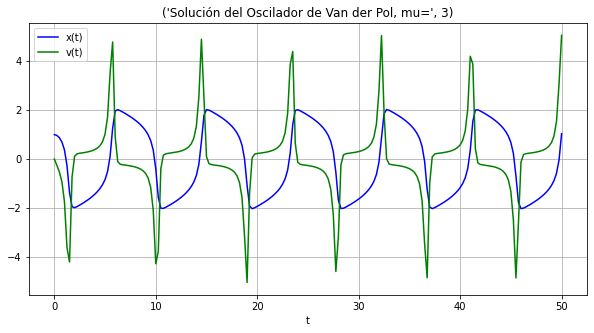

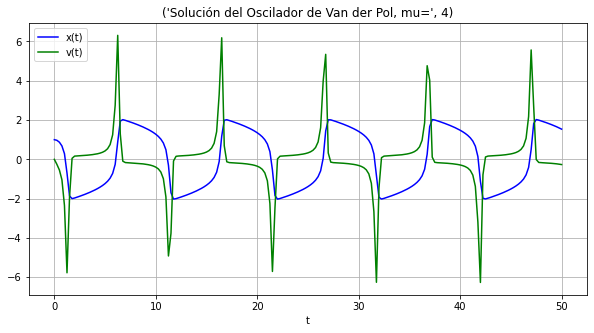

In [205]:
#Definimos la función F(t,y), el lado derecho de la ecuacion diferencial
def vanderpol(y,t,u):
        x, v = y
        dydt = [v, u*(1 - x**2)*v - x]
        return dydt

     
# Definimos el tiempo de integración de 0 a 50 segundos (101 puntos, h=0.1)
t = np.linspace(0, 50, 201)

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

#Hacemos que la mu se grafique desde 0 a 4 
for u in range(5):
  sol=odeint(vanderpol, y_0, t, args=(u,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.figure(figsize=(10,5))
  plt.plot(t, y1, 'b', label='x(t)')
  plt.plot(t, y2, 'g', label='v(t)')
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol, mu=',u))
  plt.xlabel('t')
  plt.grid()
  plt.show()

**Ejercicio 2:**

Siguiendo con el ejemplo anterior del oscilador de Van de Pol, reproduce la gráfica del plano fase ($\theta, \omega$) que aparece en la Wikipedia para distintos valores de $\mu$ y se reproduce abajo. 

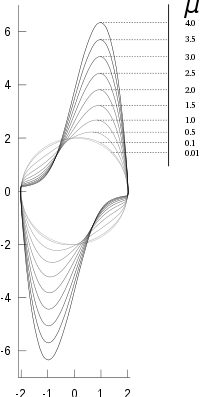

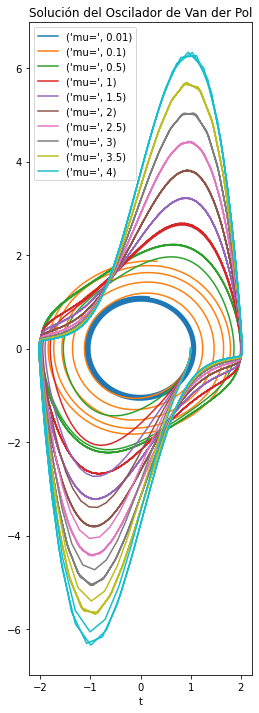

In [206]:
def vanderPol(y,t,u):
        x, v = y
        dydt = [v, u*(1 - x**2)*v - x]
        return dydt

# Paso de integración h = (tmax-t0)/Npts
#lo puso el profe
t0=0
tmax=30.0
Npts=600

t = np.linspace(0,30,Npts) # Definimos el tiempo de integración

# Definimos las condiciones iniciales 
t_0 = 0.0
# y_0 = [x_0, v_0] 
y_0 = [1.0, 0.0]

# Definimos los errores de tolerancia para la solución
#esto lo pueso el profe 
abserr = 1.0e-8
relerr = 1.0e-6
plt.figure(figsize=(4,12))

for u in [0.01,0.1,0.5,1,1.5,2,2.5,3,3.5,4]:
  sol=odeint(vanderPol, y_0, t, args=(u,), atol=abserr, rtol=relerr)
  y1=sol[:,0] # x(t)
  y2=sol[:,1] # v(v)
  plt.plot(y1, y2, label=('mu=',u))
  plt.legend(loc='best')
  plt.title(('Solución del Oscilador de Van der Pol'))
  plt.xlabel('t')
  plt.grid()
plt.show()

**Ejercicios 3:**

Encuentre las soluciones de las siguientes Ecuaciones Diferenciales Ordinarias, utilizando los siguientes métodos:


*   Método de Euler
*   Método de Runge-Kutta RK4
*   Función *scipy.integrate.odeint* ó *scipy.integrate-solve_ivp*

**Ejercicio 3.1:** 

\begin{equation*}
\frac{d^2 x}{dt^2} + k (\frac{dx}{dt})^2 -g = 0, \ x(0)=0, \ \frac{dx}{dt}(0). = 0, \ k>0.
\end{equation*}

In [207]:
#Método de Euler 
def euler(y,t,k,g):
        x, v = y
        dvdt = [v, -k*v**2 + g]
        return dvdt
#donde v es dx/dt 
#condiciones iniciales
t0 = 0
x0 = 0
v0 = 0
#constantes
k = 1
g = 9.81
#Tiempo de  de integración 
t0=0
tmax=30.0
#Pasos
p=600

t = np.linspace(0,tmax,p) # Definimos el tiempo de integración



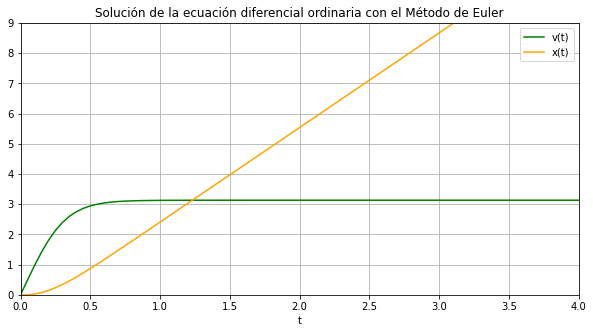

In [208]:
#Resolvemos la primera ecuación
f = lambda v,t: -k*v**2 + g 

v = np.zeros(len(t))
v[0] = v0

x = np.zeros(len(t))
x[0] = x0
    
for n in range(0,len(t)-1):
  v[n+1] = v[n] + f(v[n],t[n])*(t[n+1] - t[n])
  x[n+1] = x[n] + v[n]*(t[n+1] - t[n])

plt.figure(figsize=(10,5))
plt.plot(t,v,'green', t,x,'orange')
plt.legend(['v(t)', 'x(t)'])
plt.title('Solución de la ecuación diferencial ordinaria con el Método de Euler')
plt.axis([0,4,0,9])
plt.grid()
plt.xlabel('t')
plt.show()

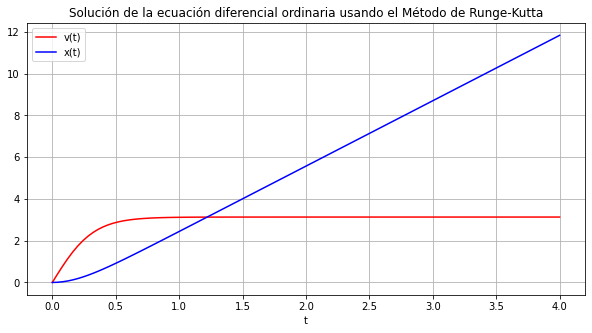

In [209]:
#Usando Runge-Kutta
def rungekutta(f, x0, y0, h):
    k_0 = f(x0, y0)
    k_1 = f(x0 + h/2, y0 + h/2 * k_0)
    k_2 = f(x0 + h/2, y0 + h/2 * k_1)
    k_3 = f(x0 + h, y0 + h * k_2)
#Donde para las ecuaciones diferenciales ordinarias tenemos que:
    k = 1/6 * (k_0 + 2.0*k_1 + 2.0*k_2 + k_3)
    x1 = x0 + h
    y1 = y0 + h * k
    return x1, y1

#Límites
i = 0.0
s = 4.0 
P = 100
h = (s-i)/P

#Condiciones iniciales
t0 = 0.0
x0 = 0.0
v0 = 0.0

#Constantes
g = 9.81
k = 1
t=0.0
v=0.0
t_values.clear()
v_values.clear()


#Resolución de la primera ecuación
f = lambda t,v: -k*v**2 + g 
t_values = [t0]
v_values = [v0]

for _ in range(P):
  t, v = rungekutta(f, t, v, h)

  t_values.append(t)
  v_values.append(v)

#Como no tenemos una ecuación explícita que dependa de x y t no podemos integrar la segunda ecuación
#Por lo que usamos la función solve_ivp
#Función F
#Lado derecho de la ecuacion diferencial
def ecuacion(t,y,k,g):
      dvdt = [y[1], -k*(y[1])**2 + g]
      return dvdt

#Condiciones iniciales
y_0 = [x0, v0]

#Tiempo de integración
t = np.linspace(i,s,P)

sol = solve_ivp(lambda t, y,mu: ecuacion(t, y, k, g),(i,s), y0=y_0, method='RK45', t_eval=t, args=(u,), rtol=relerr, atol=abserr)
x=sol.y[0]

#Graficamos la solución
plt.figure(figsize=(10,5))
plt.plot(t_values,v_values,'r', label='v(t)')
plt.plot(t,x,'blue', label='x(t)')
plt.legend(loc='best')
plt.grid()
plt.title('Solución de la ecuación diferencial ordinaria usando el Método de Runge-Kutta')
plt.xlabel('t')
plt.show()

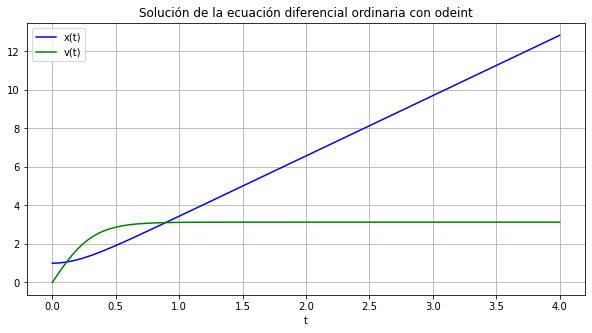

In [210]:
#Definimos el tiempo de integración
t = np.linspace(i,s,P)

#Definimos las condiciones iniciales 

a0 = [1.0, 0.0]

y=odeint(euler, a0, t, args=(k,g), atol=abserr, rtol=relerr)

#x(t) 
y1=y[:,0]
#v(t)
y2=y[:,1]

plt.figure(figsize=(10,5))
plt.plot(t, y1, 'blue', label='x(t)')
plt.plot(t, y2, 'green', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria con odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.2:**

\begin{equation*}
\frac{d^2 y}{d x^2} + \frac{2}{x} \frac{dy}{dx} + y^5 =0, \ y(0) = 1, \ \frac{dy}{dx}(0)=0. 
\end{equation*}

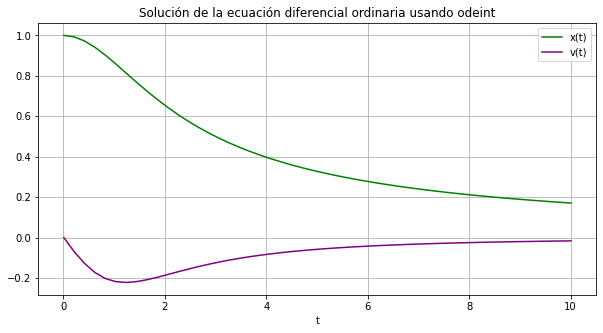

In [211]:
#Como la función no depende de solamente de dos variables, no podremos resolverla por los dos primeros métodos 
#Usaremos la función scipy.integrate.odeint
#Usamos v = dy/dx

def funcion(a, x):
        y, v = a
        dadx = [v, -(2/x)*v -y**5]
        return dadx

x0 = 0.1
y0 = 1.0
v0 = 0
#Condiciones iniciales
a0 = [1.0, 0.0]
#Definimos la x de integración
x = np.linspace(0.01, 10.01, 50)
sol=odeint(funcion, a0, x, atol=abserr, rtol=relerr)

# La solución regresa ambas x(t) y v(t)
y1=sol[:,0]
y2=sol[:,1]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'g', label='x(t)')
plt.plot(x, y2, 'purple', label='v(t)')
plt.legend(loc='best')
plt.title('Solución de la ecuación diferencial ordinaria usando odeint')
plt.xlabel('t')
plt.grid()
plt.show()

**Ejercicio 3.3:**

\begin{equation*}
\frac{d^3 y}{d x^3} = (x-1)^2 + y^2 + \frac{dy}{dx} -2, \ y(0)=1, \ y'(0)=0, \ y''(0)=2.
\end{equation*}

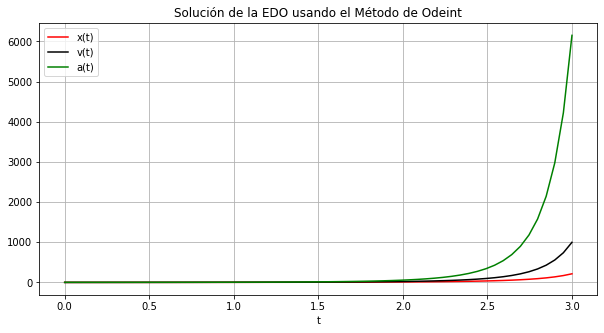

In [212]:
#Como la función no depende de solamente de dos variables, no podremos resolverla por los dos primeros métodos 
#Usaremos la función scipy.integrate.odeint
#Usamos v = dy/dx

def funcionod(b, x):
        y, v, a = b
        dbdx = [v, a, (x-1)**2 + y**2 + v - 2]
        return dbdx


#limites
x0 = 0.0
y0 = 1.0
v0 = 0.0
a0 = 3.0
p = 60
x = np.linspace(x0, a0, p)

#Condiciones iniciales 
x_0 = x0
a0_0 = [y0, v0, a0]

#abserr y relerr son los errores que pusimos al inicio 
#La solución de la forma:
s=odeint(funcionod, a0_0, x, atol=abserr, rtol=relerr)

#Nos regresa la solución
y1=s[:,0]
y2=s[:,1]
y3=s[:,2]

plt.figure(figsize=(10,5))
plt.plot(x, y1, 'r', label='x(t)')
plt.plot(x, y2, 'black', label='v(t)')
plt.plot(x, y3, 'g', label='a(t)')
plt.legend(loc='best')
plt.title('Solución de la EDO usando el Método de Odeint')
plt.xlabel('t')
plt.grid()
plt.show()